## Week 5-2: Principal Component Analysis


#### Last time
* Loss function
* K-means
* GMM

#### Today
* GMM (cont'd)
* PCA, probabilistic PCA, functional PCA, sparse PCA, factor analysis

#### Reference
- Ch 14.5 of ESL
- HDS: Ch8 of Wainwright, M. J. (2019). High-dimensional Statistics. _Cambridge Series in Statistical and Probabilistic Mathematics_
- Baik, J and J. Silverman (2004). Eigenvalues of Large Sample Covariance Matrices of Spiked Population Models. _Journal of Multivariate Analysis_ 97:1382--1408
- D. Paul (2007). Asymptotics of sample eigenstructure for a large dimensional spiked covariance model. _Statistica Sinica_ 17:1617--1642
- M. E. Tipping and C. M. Bishop (1999). Probabilistic principal component analysis. _JRSSB_ 61:611--622
- H. Zou, T. Hastie, and Robert Tibshirani (2006). Sparse Principal Component Analysis. _JCGS_ 15:265--286

### Gaussian mixture model

See notes for the GM model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


mouse = pd.read_csv('mouse.csv', sep = " ", header = None)
X = np.array([mouse[0], mouse[1]])
GM = GaussianMixture(n_components=3, random_state=0).fit(np.transpose(X))

In [2]:
GM_predict = GM.predict(np.transpose(X))

In [3]:
mouse_GM_pred = np.transpose(np.array([mouse[0], mouse[1], GM_predict]))
mouse_head_GM_pred = mouse_GM_pred[mouse_GM_pred[:, 2] == 0]
mouse_EL_GM_pred = mouse_GM_pred[mouse_GM_pred[:, 2] == 1]
mouse_ER_GM_pred = mouse_GM_pred[mouse_GM_pred[:, 2] == 2]

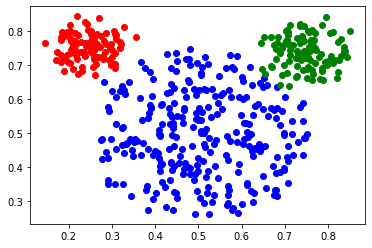

In [4]:
# plot data with predicted label

plt.scatter(mouse_head_GM_pred[:, 0], mouse_head_GM_pred[:, 1],c='b',label=0)
plt.scatter(mouse_EL_GM_pred[:,0], mouse_EL_GM_pred[:,1], c='r',label=1)
plt.scatter(mouse_ER_GM_pred[:,0], mouse_ER_GM_pred[:,1], c='g',label=2)

EM algorithm for Gaussian mixture model

See notes

### Principal component analysis

_Principal component analysis (PCA)_ is often used to reduce the dimensionality of a data set consisting of a large number of interrelated variables through orthogonal linear transformation. As a result the variation present in the data set can be retained as much as possible.


Recall the (thin) singular value decomposition (SVD) for $X = UDV'$. The left eigenvectors $U'U = I$ and $D$ is a diagonal matrix containing eigenvalues and $V'V = VV' = I$. 

For a dataset $x^n = (x_1, \dots, x_n)$, the $q$-th pricipal axes $(v_j)$ are the $q$ dominant eigenvectors (i.e., those associated with $\lambda_1, \dots \lambda_q$) of the sample covariance 
$$
S = \frac{1}{n} \sum_{i=1}^n (x_i - \bar x)(x_i - \bar x)'.
$$

- _The $q$-th principal component (PCs)_ is the $q$-th eigenvector of the covariance matrix $S$
- _The $q$-th Loadings_ is $v_q \times d_q$.
- _PC scores_ are the positions of each observation in this new coordinate system of principal components given by $XV$.

Yale Face Database

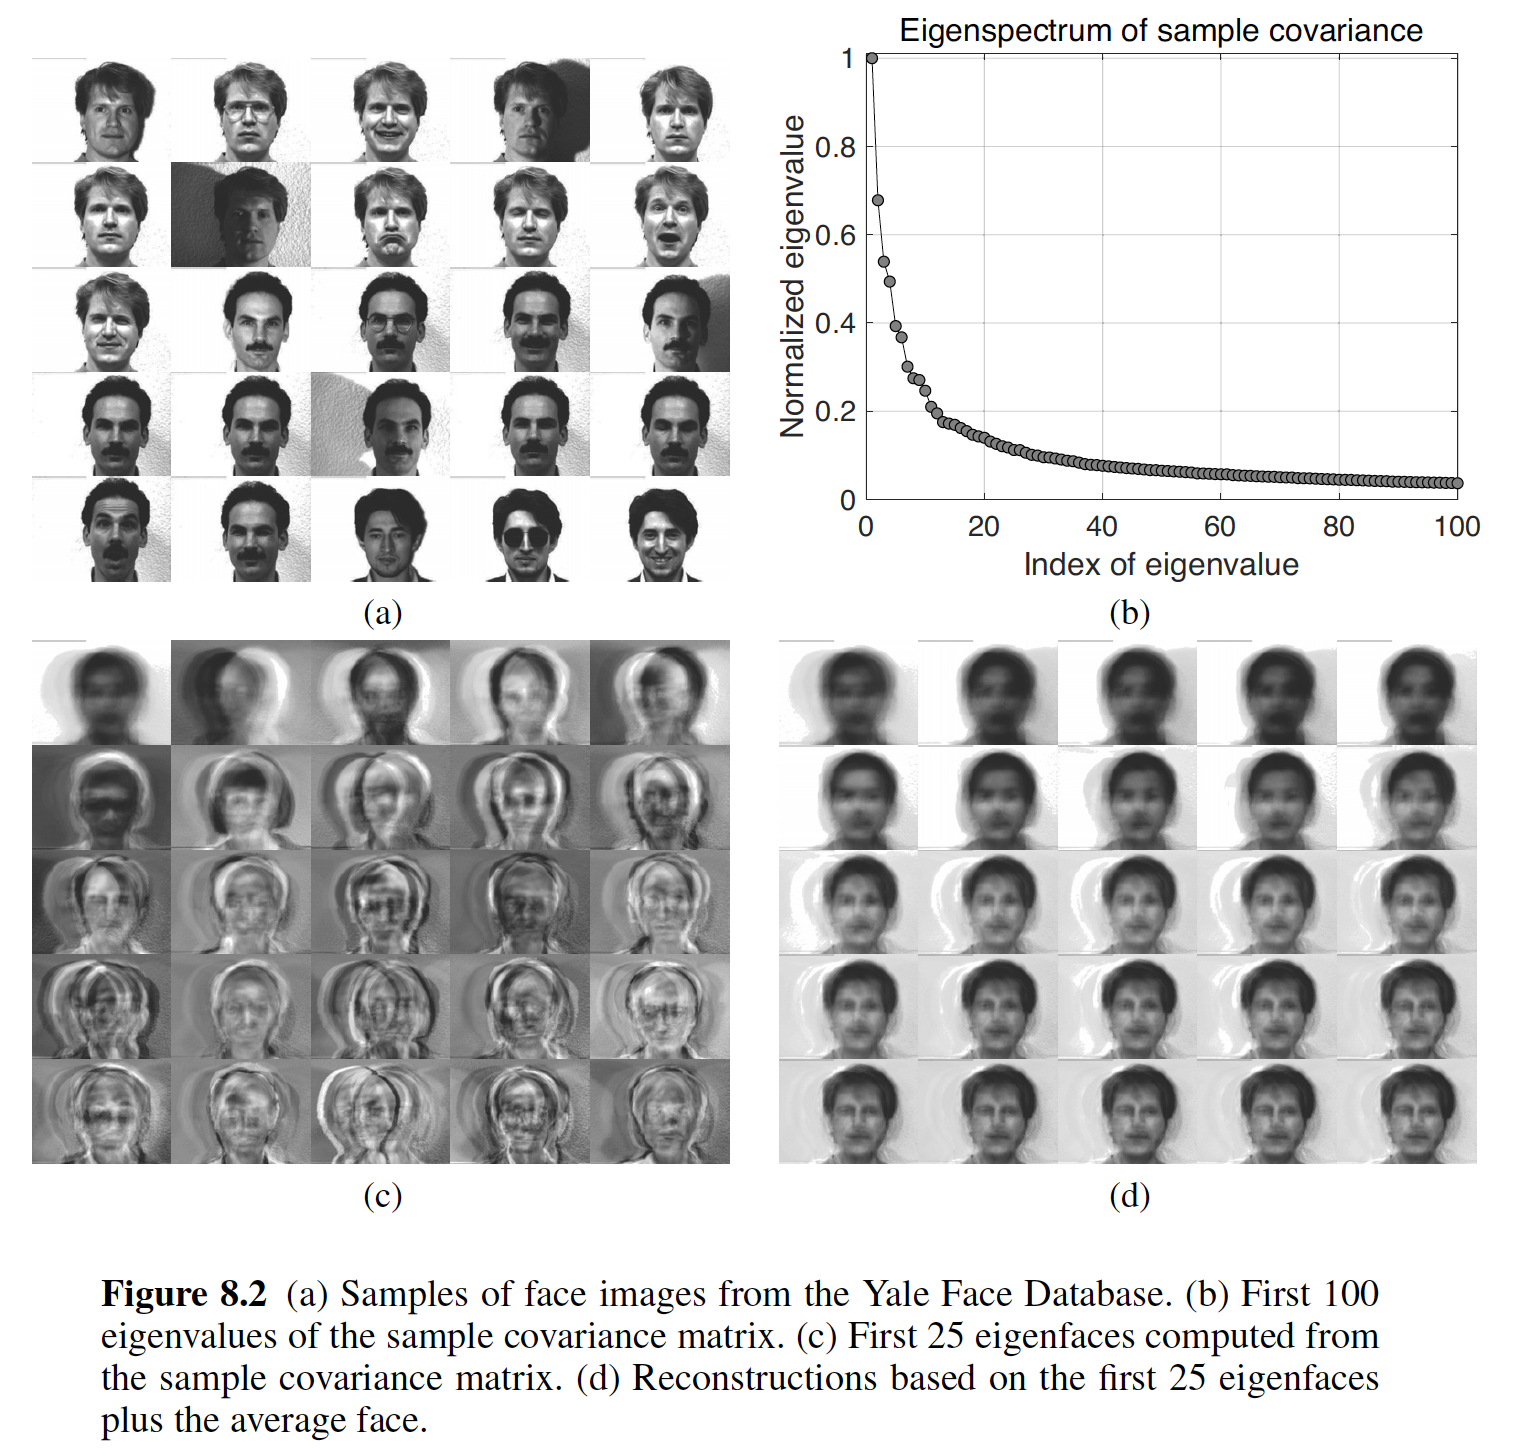

(Source: P239 of HDS)

### Probabilistic principal component analysis and factor analysis

Consider the model 
$$
x_i = \mu + \theta w_i + \sigma^2 \varepsilon_i,
$$
where 
$\theta \in \mathbb{R}^{p \times r}$ is the loadings matrix (i.e., $\theta = VD$),
$w_i \overset{\text{i.i.d}}{\sim} N(0, I_r)$, and $\varepsilon_i \overset{\text{i.i.d}}{\sim} N(0, I_p)$.

One can check that $x_i \sim N(\mu, \Sigma)$, $\Sigma = \theta\theta' + \sigma^2 I_p$. The $p$-th eigenvalue of $\Sigma$ is $\|\theta_{\cdot p}\|^2 + \sigma^2$ and $p$-th eigenvector is $\frac{\theta_{\cdot p}}{\|\theta_{\cdot p}\|}$. When $r < p$, there are $r$ "spikes" ($d_1^2, \dots, d_r^2$) in the spectrum of $\Sigma$, the covariance matrix is called spiked-covariance matrix. The model is then known as the spiked-covariance model. 

How to estimate $\theta$ and $\sigma^2$?


Factor analysis

Consider the model 

$$
x_i = \mu + \beta w_i + \sigma^2 \varepsilon_i,
$$
where 
$\beta \in \mathbb{R}^{p \times p}$ are the factor loadings matrix (i.e., $\beta = VDO'$, $O'O = I_r$),
$w_i \overset{\text{i.i.d}}{\sim} N(0, I_p)$, and $\varepsilon_i \overset{\text{i.i.d}}{\sim} N(0, \Psi)$.

Thus, $x_i \sim N(\mu, \beta \beta' + \Psi)$

Difference between PCA and FA 
- PCA asserts that all variance in a data set is common variance but FA does not
- PCA is used to decompose the data into a smaller number of orthogonal components; FA is used to understand the underlying ‘cause’ which these factors (latent or constituents) capture much of the information of a set of variables in the dataset data.
- The aim of PCA is to explain the variance while that of FA is to explain the covariance between the variables.

Read more [here](https://stats.stackexchange.com/questions/1576/what-are-the-differences-between-factor-analysis-and-principal-component-analysi) and [here](https://stats.stackexchange.com/questions/123063/is-there-any-good-reason-to-use-pca-instead-of-efa-also-can-pca-be-a-substitut)



#### High-dimensional setting

In the classical setting $n \gg p$, the sample covariance matrix $\hat \Sigma = \frac{1}{n} \sum_{i=1}^n x_ix_i'$ is an unbiased estimator. Consider the $\ell_2$-norm $\|\hat \Sigma - \Sigma\|_2$, the largest eigenvalue of $\hat \Sigma - \Sigma$, converges to zero almost surely as $n\to \infty$. 

Question: what happens when $p/n = \alpha \in (0, 1)$? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)
n = 4000
d = 800
alpha = d/n
mean = np.zeros(d)
cov = np.identity(d)
x = np.random.multivariate_normal(mean, cov, n)

In [6]:
x.shape

(4000, 800)

In [7]:
sample_cov = x.T @ x / n
eigen_val, eigen_vec = np.linalg.eig(sample_cov)

(array([0.        , 0.        , 0.14130435, 0.77173913, 0.90217391,
        0.88043478, 0.80434783, 0.76086957, 0.7173913 , 0.64130435,
        0.60869565, 0.51086957, 0.4673913 , 0.43478261, 0.35869565,
        0.31521739, 0.2173913 , 0.15217391, 0.01086957, 0.        ]),
 array([0.   , 0.115, 0.23 , 0.345, 0.46 , 0.575, 0.69 , 0.805, 0.92 ,
        1.035, 1.15 , 1.265, 1.38 , 1.495, 1.61 , 1.725, 1.84 , 1.955,
        2.07 , 2.185, 2.3  ]),
 <BarContainer object of 20 artists>)

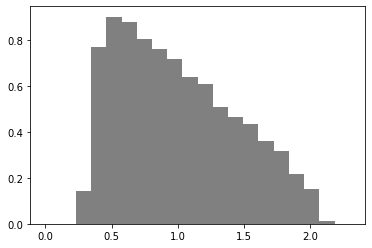

In [8]:
plt.hist(eigen_val, bins = 20, range = (0, 2.3), density = True, color = "gray")

In [9]:
# set alpha = 0.5

n = 4000
d = 2000
mean = np.zeros(d)
cov = np.identity(d)
x = np.random.multivariate_normal(mean, cov, n)

In [10]:
sample_cov = x.T @ x / n
eigen_val, eigen_vec = np.linalg.eig(sample_cov)

(array([0.31      , 0.86333333, 0.73333333, 0.62      , 0.54      ,
        0.47666667, 0.43      , 0.38333333, 0.35      , 0.32      ,
        0.28333333, 0.26      , 0.23333333, 0.20333333, 0.18      ,
        0.16666667, 0.12666667, 0.1       , 0.07      , 0.01666667]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

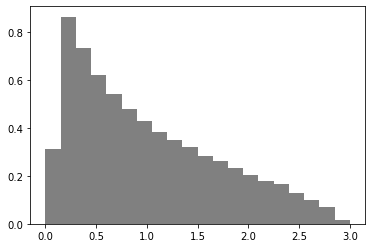

In [11]:
plt.hist(eigen_val, bins = 20, range = (0, 3), density = True, color = "gray")

In Ch 6 of HDS, it provides an upper bound for the maximum eigenvalue $\gamma_1(\hat \Sigma)$ given by 
$$
P(\gamma_1(\hat \Sigma) \geq (1 + \sqrt{p/n} + \delta)^2 ) \leq \exp(- n \delta^2/2),
$$
for all $\delta \geq 0$.

#### Marčenko-Pastur law

Let $\hat \Sigma$ be the sample covariance matrix given above, denote $\gamma(\hat \Sigma) \in \mathbb{R}^p$ be the vector of eigenvalues of $\hat \Sigma$, suppose $p/n \to \alpha \in (0, 1)$, then 
$$
f_{MP}(\gamma) \propto \sqrt{\frac{(t_1(\alpha) - \gamma)(\gamma - t_2(\alpha))}{\gamma}},
$$
where $t_1(\alpha) = \big(1 - \sqrt{\alpha}\big)^2$ and $t_2(\alpha) = \big(1 + \sqrt{\alpha}\big)^2$, and $f_{MP}$ is supported on the interval $[t_1(\alpha), t_2(\alpha)]$.

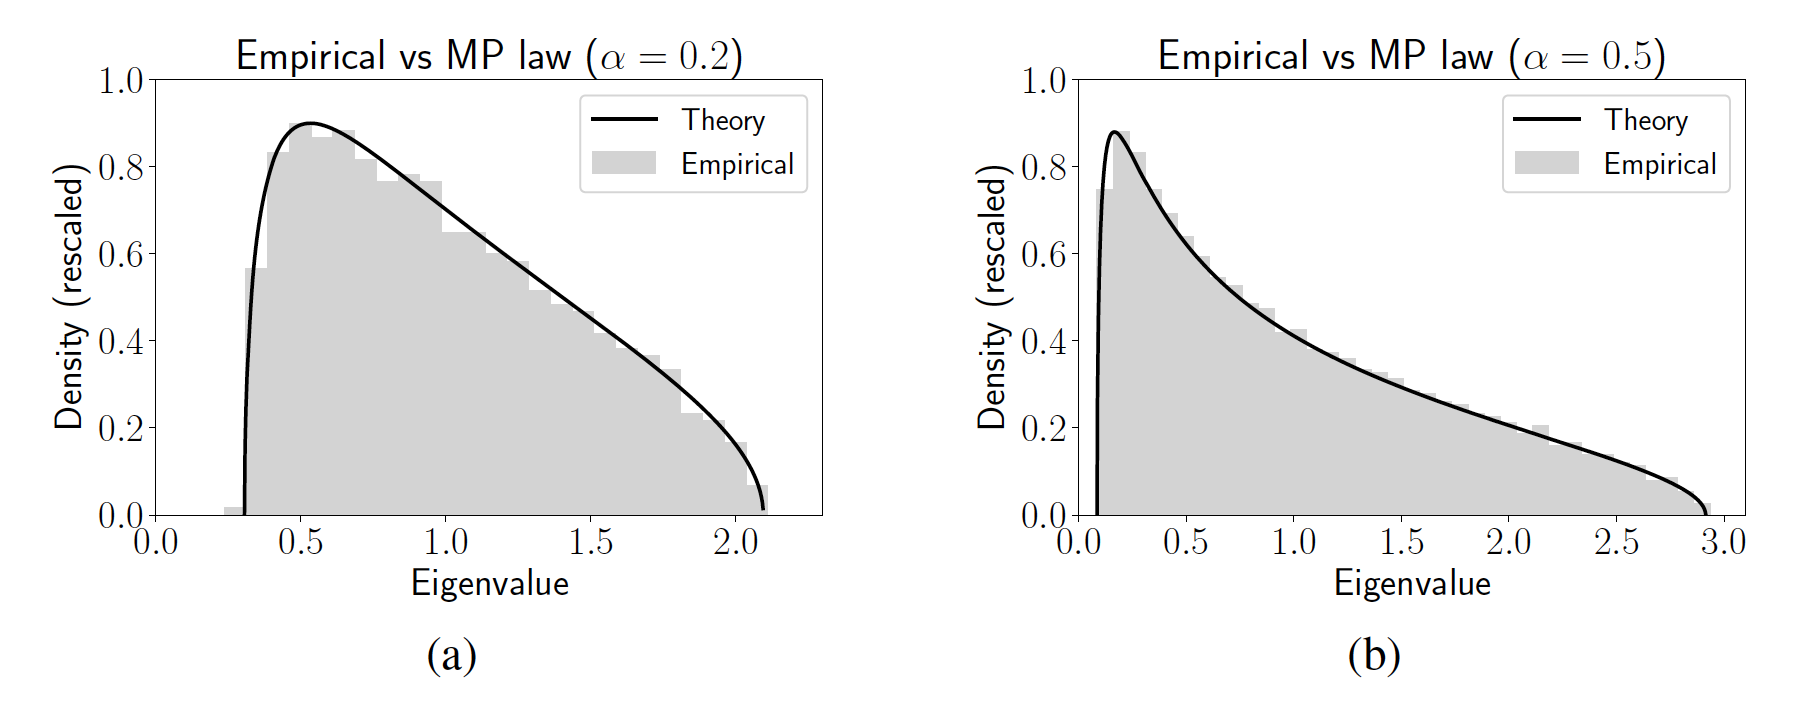

(array([0., 0., 0., 0., 5., 5., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

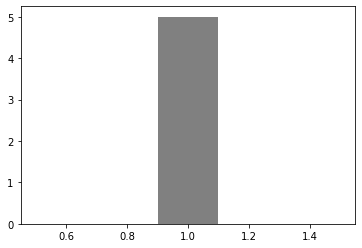

In [3]:
# set alpha = 0.5

n = 4000
d = 10
mean = np.zeros(d)
cov = np.identity(d)
x_low = np.random.multivariate_normal(mean, cov, n)
sample_cov = x_low.T @ x_low / n
eigen_val, eigen_vec = np.linalg.eig(sample_cov)
plt.hist(eigen_val, range = (0.5, 1.5), density = True, color = "gray")

#### Spiked-covariance model

The spiked-covariance model assumes the eigenvalues of $\Sigma = (\gamma_1, \dots, \gamma_r, 1, 1, \dots, 1)$, 
$\gamma_1 \geq \gamma_2 \geq \dots, \gamma_r > 1$. Again, we assume $p/n \to \alpha \in (0, 1)$.

According to Baik & Silverman (2006):

- If $1 \leq \gamma_v \leq 1+ \sqrt{\alpha}$, $p / n \to \alpha \in (0, 1)$, then 
$$
\hat \gamma_v \to (1+\sqrt{\alpha})^2,
$$
almost surely as $n \to \infty$


- If $\gamma_v > 1+ \sqrt{\alpha}$, $p / n \to \alpha \in (0, 1)$, then 
$$
\hat \gamma_v \to \gamma_v \Big(1 + \frac{\alpha}{\gamma_v - 1}\Big),
$$
almost surely as $n \to \infty$

How about eigenvectors?

According to Debashis Paul (2007):


- If $\gamma_v > 1+ \sqrt{\alpha}$, $p / n \to \alpha \in (0, 1)$, 
let $p_v$ be the $v$-th eigenvector associated with the eigenvalue $\gamma_v$ 
and $\hat p_v$ be the estimated value,
then 
$$
|\langle \hat p_v, p_v\rangle| \to \sqrt{\frac{\Big(1 - \frac{\alpha}{(\gamma_v - 1)^2}\Big)}{\Big(1 + \frac{\alpha}{\gamma_v - 1}\Big)}}
$$
almost surely as $n \to \infty$


- If $1 \leq \gamma_v \leq 1+ \sqrt{\alpha}$, $p / n \to \alpha \in (0, 1)$, 
let $p_v$ be the $v$-th eigenvector associated with the eigenvalue $\gamma_v$
and $\hat p_v$ be the estimated value,
then 
$$
|\langle \hat p_v, p_v\rangle| \to 0,
$$
almost surely as $n \to \infty$.

This is so called the _phase transition phenomenon_.
